## CustomerSignUp : RDMS

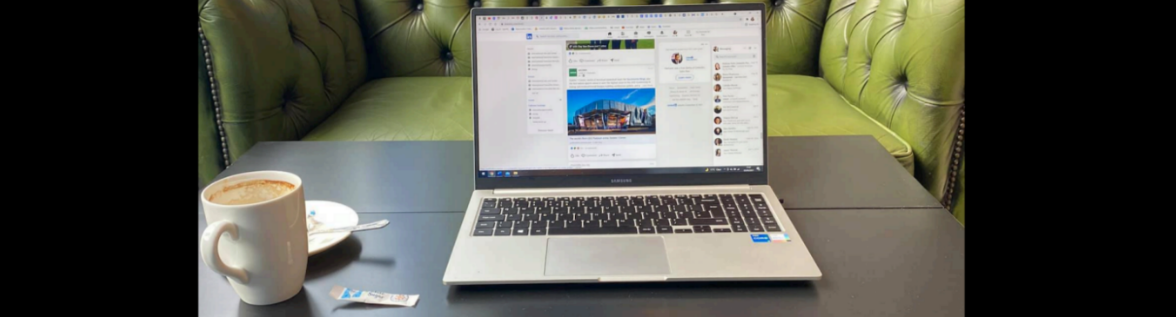

### Hemant Thapa

In [1]:
import sqlite3
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

In [2]:
#function for signup process
def signup_process(conn):
    cursor = conn.cursor()
    
    print("Hello, I heard you are interested in our product.")
    while True:
        value = input("Enter your First Name (type 'exit' to cancel): ").strip()
        if value.lower() == 'exit':
            print("Exiting signup process...")
            return
        elif not value:
            print("Error: First Name cannot be empty.")
            continue

        value1 = input("Enter your Last Name (type 'exit' to cancel): ").strip()
        if value1.lower() == 'exit':
            print("Exiting signup process...")
            return
        elif not value1:
            print("Error: Last Name cannot be empty.")
            continue

        value2 = input("Enter your Country (type 'exit' to cancel): ").strip()
        if value2.lower() == 'exit':
            print("Exiting signup process...")
            return
        elif not value2:
            print("Error: Country cannot be empty.")
            continue

        value3 = input("Enter your Address (type 'exit' to cancel): ").strip()
        if value3.lower() == 'exit':
            print("Exiting signup process...")
            return
        elif not value3:
            print("Error: Address cannot be empty.")
            continue

        value4 = input("Enter your Postcode (type 'exit' to cancel): ").strip()
        if value4.lower() == 'exit':
            print("Exiting signup process...")
            return
        elif not value4:
            print("Error: Postcode cannot be empty.")
            continue

        value5 = input("Gender (type 'exit' to cancel): ").strip()
        if value5.lower() == 'exit':
            print("Exiting signup process...")
            return
        elif not value5:
            print("Error: Gender cannot be empty.")
            continue

        value6 = input("Enter your Email (type 'exit' to cancel): ").strip().lower()
        if value6.lower() == 'exit':
            print("Exiting signup process...")
            return
        elif not value6:
            print("Error: Email cannot be empty.")
            continue

        while True:
            value7 = input("Enter your Contact Number ('exit' to cancel): ").strip()
            if value7.lower() == 'exit':
                print("Exiting signup process...")
                return
            elif value7.isdigit():
                break
            else:
                print("Error: Contact must be numerical.")
        
        print("\nSuccessfully, sign-up completed.")
        
        # Insert user data into the SQLite database
        cursor.execute('''
            INSERT INTO users (first_name, last_name, country, address, postcode, gender, email, contact)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', (value, value1, value2, value3, value4, value5, value6, int(value7)))

        conn.commit()

In [3]:
#function for adding a user
def add_user(conn):
    signup_process(conn)

#function for updating records
def update_record(conn, email, new_first_name, new_last_name, new_country, new_address, new_postcode, new_gender, new_contact):
    cursor = conn.cursor()
    
    cursor.execute('''
        UPDATE users
        SET first_name=?, last_name=?, country=?, address=?, postcode=?, gender=?, contact=?
        WHERE email=?
    ''', (new_first_name, new_last_name, new_country, new_address, new_postcode, new_gender, new_contact, email))

    conn.commit()
    print("Record updated successfully.")

#function for deleting records
def delete_record(conn, email):
    cursor = conn.cursor()
    
    cursor.execute('DELETE FROM users WHERE email=?', (email,))
    conn.commit()
    print("Record deleted successfully.")

#function to view records
def view_records(conn):
    cursor = conn.cursor()
    
    cursor.execute('SELECT * FROM users')
    records = cursor.fetchall()

    if not records:
        print("Records are empty.")
        return

    headers = ["ID", "First Name", "Last Name", "Country", "Address", "Postcode", "Gender", "Email", "Contact"]
    table = [headers] + [(record[0], record[1], record[2], record[3], record[4], record[5], record[6], record[7], record[8]) for record in records]

    print(tabulate(table, headers="firstrow", tablefmt="grid"))

In [4]:
#main function for user input
def main():
    #connect to the SQLite database (it will create the database if it doesn't exist)
    conn = sqlite3.connect('user_records.db')

    #creating a table to store user records if it doesn't exist
    cursor = conn.cursor()
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS users (
            id INTEGER PRIMARY KEY,
            first_name TEXT,
            last_name TEXT,
            country TEXT,
            address TEXT,
            postcode TEXT,
            gender TEXT,
            email TEXT UNIQUE,
            contact INTEGER
        )
    ''')

    conn.commit()

    while True:
        print("\nMenu:")
        print("1. Type 'add' to Add User")
        print("2. Type 'up' to Update a record")
        print("3. Type 'delete' to Delete a record")
        print("4. Type 'view' to View records")
        print("5. Type 'exit' to Exit")
        choice = input("Enter your choice: ")

        if choice == 'exit':
            # Close the database connection and exit the program
            conn.close()
            break

        if choice == 'add':
            add_user(conn)

        elif choice == 'up':
            email = input("Enter the email of the record to update (type 'exit' to cancel): ").strip().lower()
            if email == 'exit':
                continue
            new_first_name = input("Enter the new first name (type 'exit' to cancel): ").strip()
            if new_first_name.lower() == 'exit':
                continue
            new_last_name = input("Enter the new last name (type 'exit' to cancel): ").strip()
            if new_last_name.lower() == 'exit':
                continue
            new_country = input("Enter the new country (type 'exit' to cancel): ").strip()
            if new_country.lower() == 'exit':
                continue
            new_address = input("Enter the new address (type 'exit' to cancel): ").strip()
            if new_address.lower() == 'exit':
                continue
            new_postcode = input("Enter the new postcode (type 'exit' to cancel): ").strip()
            if new_postcode.lower() == 'exit':
                continue
            new_gender = input("Enter the new gender (type 'exit' to cancel): ").strip()
            if new_gender.lower() == 'exit':
                continue
            while True:
                new_contact = input("Enter the new contact (type 'exit' to cancel): ").strip()
                if new_contact.lower() == 'exit':
                    break
                if new_contact.isdigit():
                    new_contact = int(new_contact)
                    break
                else:
                    print("Error: Contact must be a numerical value.")
            if new_contact == 'exit':
                continue
            update_record(conn, email, new_first_name, new_last_name, new_country, new_address, new_postcode, new_gender, new_contact)

        elif choice == 'delete':
            email = input("Enter the email of the record to delete (type 'exit' to cancel): ").strip().lower()
            if email == 'exit':
                continue
            delete_record(conn, email)

        elif choice == 'view':
            view_records(conn)

        else:
            print("Error: Please enter a valid choice.")

main()


Menu:
1. Type 'add' to Add User
2. Type 'up' to Update a record
3. Type 'delete' to Delete a record
4. Type 'view' to View records
5. Type 'exit' to Exit


Enter your choice:  view


+------+--------------+-------------+----------------+-----------+------------+----------+---------------------------+------------+
|   ID | First Name   | Last Name   | Country        | Address   | Postcode   | Gender   | Email                     |    Contact |
+======+==============+=============+================+===========+============+==========+===========================+============+
|    1 | Hemant       | Thapa       | United Kingdom | Glasgow   | G128RQ     | Male     | hemantthapa1998@gmail.com | 7752106224 |
+------+--------------+-------------+----------------+-----------+------------+----------+---------------------------+------------+

Menu:
1. Type 'add' to Add User
2. Type 'up' to Update a record
3. Type 'delete' to Delete a record
4. Type 'view' to View records
5. Type 'exit' to Exit


Enter your choice:  exit


#### MIT License

Copyright (c) 2024 Hemant Thapa

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.